In [1]:
!pip install lime

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as c_map
from IPython.display import Image, display
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

import lime
from lime import lime_image
from lime import submodular_pick

from skimage.segmentation import mark_boundaries
from PIL import Image
np.random.seed(123)

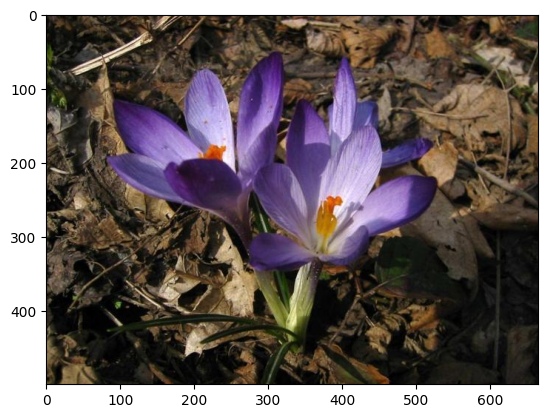

In [2]:
import matplotlib.pyplot as plt

image_path = Image.open(r"C:\Users\admin\Documents\126156072\image_0326.jpg")
plt.imshow(image_path)
plt.show()

In [3]:
IMG_SIZE = (299, 299)

def transform_image(image, size):

    image = image.resize(size)
    img = np.array(image)
    img = np.expand_dims(img, axis=0)
    img = img/255.0
    return img
normalized_img = transform_image(image_path, IMG_SIZE)


1/1 [==============================] - 1s 860ms/step
The predicted class is : daisy


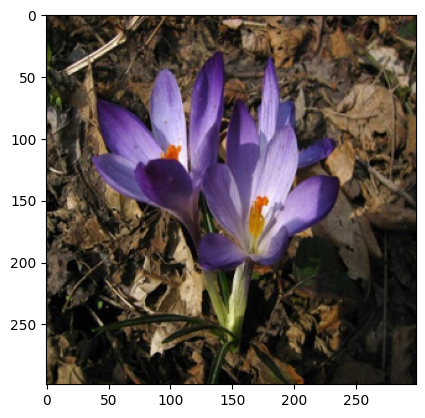

In [4]:
model = Xception(weights="imagenet")

def get_model_predictions(data):
    model_prediction = model.predict(data)
    print(f"The predicted class is : {decode_predictions(model_prediction, top=1)[0][0][1]}")
    return decode_predictions(model_prediction, top=1)[0][0][1]

plt.imshow(normalized_img[0])
pred_orig = get_model_predictions(normalized_img)

In [5]:
model_prediction = model.predict(normalized_img)
top5_pred = decode_predictions(model_prediction, top=5)[0]
for pred in top5_pred:
    print(pred[1])

1/1 [==============================] - 0s 144ms/step
daisy
pot
earthstar
bee
ant


In [6]:
explainer = lime_image.LimeImageExplainer()
exp = explainer.explain_instance(normalized_img[0],
                                 model.predict,
                                 top_labels=5,
                                 hide_color=0,
                                 num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 1s 859ms/step


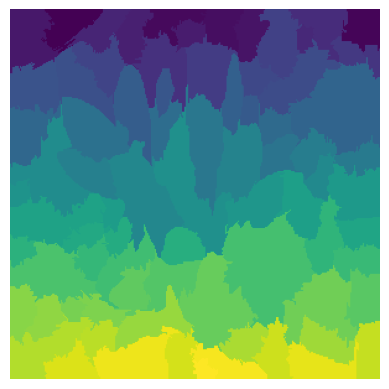

In [7]:
plt.imshow(exp.segments)
plt.axis('off')
plt.show()

In [8]:
def generate_prediction_sample(exp, exp_class, weight = 0.1, show_positive = True, hide_background = True):

    image, mask = exp.get_image_and_mask(exp_class,
                                         positive_only=show_positive,
                                         num_features=6,
                                         hide_rest=hide_background,
                                         min_weight=weight
                                        )
    plt.imshow(mark_boundaries(image, mask))
    plt.axis('off')
    plt.show()

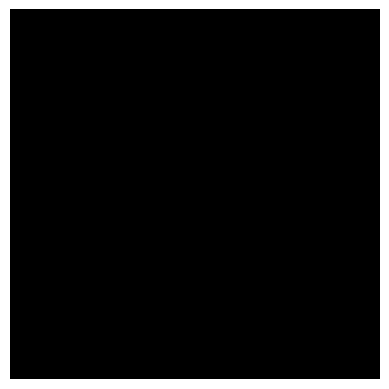

In [10]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = True)

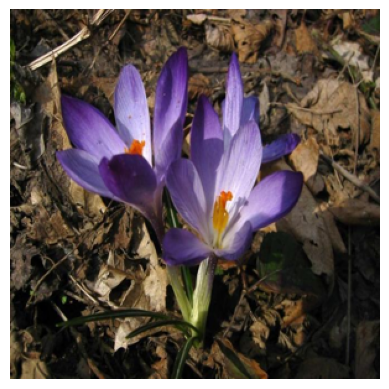

In [9]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = True, hide_background = False)

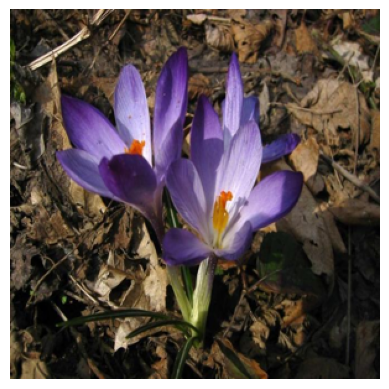

In [10]:
generate_prediction_sample(exp, exp.top_labels[0], show_positive = False, hide_background = False)

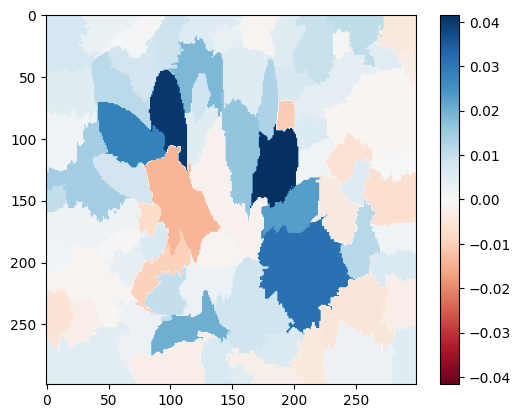

In [11]:
def explanation_heatmap(exp, exp_class):

    dict_heatmap = dict(exp.local_exp[exp_class])
    heatmap = np.vectorize(dict_heatmap.get)(exp.segments)
    plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
    plt.colorbar()
    plt.show()

explanation_heatmap(exp, exp.top_labels[0])

In [12]:
index = 2
print(f"We will deal with predicted class: {top5_pred[index][1]}")

We will deal with predicted class: earthstar


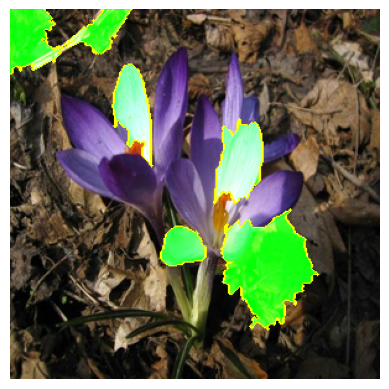

In [13]:
generate_prediction_sample(exp, exp.top_labels[index], weight = 0.0001, show_positive = False, hide_background = False)